# Repeat Matplotlib
- OOP
- subplots
- loop through axes
- stype
- also work on the last graph of lecture note of 08_pandas_read_excel for similar codes 

##### Prepare data
- these are codes from previous repetition session

In [ ]:
import pandas as pd
import numpy as np

url = "https://worldpopulationreview.com/country-rankings/most-educated-countries"
df_educ = pd.read_html(url,header=0,index_col=0)[2]
df_educ = df_educ.reset_index()
df_educ = df_educ.replace("-", np.nan)

url = "https://worldpopulationreview.com/country-rankings/list-of-countries-by-continent"
df_continent = pd.read_html(url,header=0,index_col=0)[-1]
df_continent = df_continent.reset_index()

df_merged = pd.merge(df_educ, df_continent[["Country", "Continent"]], on="Country", how="left")
df_merged["Upper Secondary Total 2022"] = df_merged["Upper Secondary Total 2022"].str.rstrip("%").astype(float) #explain why int is not ok
df_merged["Upper Secondary Total 2022"] = df_merged.groupby("Continent")["Upper Secondary Total 2022"].transform(lambda x: x.fillna(x.mean()))
df_merged.head()

,Country,Tertiary Total 2022,Tertiary Total Men 2022,Tertiary Total Women 2022,Below Upper Secondary Total 2022,Below Upper Secondary Men 2022,Below Upper Secondary Women 2022,Upper Secondary Total 2022,Upper Secondary Total Men 2022,Upper Secondary Total Women 2022,Tertiary Total 2021,Tertiary Total Men 2021,Tertiary Total Women 2021,Below Upper Secondary Total 2021,Below Upper Secondary Men 2021,Below Upper Secondary Women 2021,Upper Secondary Total 2021,Upper Secondary Total Men 2021,Upper Secondary Total Women 2021,Continent
0,Canada,63%,58%,76%,7%,6%,3%,30.0,36%,21%,66%,58%,75%,5%,6%,4%,29%,36%,21%,North America
1,Japan,56%,NaN,NaN,NaN,NaN,NaN,27.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,Ireland,54%,60%,66%,12%,5%,5%,33.0,35%,29%,63%,59%,67%,5%,6%,4%,32%,35%,28%,Europe
3,South Korea,53%,NaN,NaN,9%,NaN,NaN,38.0,NaN,NaN,65%,62%,68%,NaN,NaN,NaN,18%,14%,16%,Asia
4,United Kingdom,51%,56%,61%,19%,14%,11%,30.0,31%,28%,57%,54%,61%,12%,15%,9%,30%,31%,30%,Europe
5,Australia,51%,49%,63%,15%,10%,7%,34.0,41%,30%,54%,46%,62%,9%,10%,8%,37%,43%,30%,Oceania
6,Israel,51%,36%,57%,12%,10%,7%,38.0,54%,36%,46%,35%,57%,9%,10%,7%,45%,55%,36%,Asia
7,Luxembourg,51%,57%,63%,19%,13%,9%,30.0,31%,28%,63%,59%,68%,10%,13%,8%,27%,28%,25%,Europe
8,United States,50%,46%,56%,8%,7%,5%,42.0,47%,38%,51%,46%,57%,6%,7%,5%,43%,47%,38%,North America
9,Sweden,49%,44%,61%,14%,17%,12%,37.0,39%,27%,49%,41%,58%,16%,18%,14%,35%,42%,28%,Europe


##### plot

In [5]:
#Group the data by continent and sum the "Upper Secondary Total 2022"
continent_group = df_merged.groupby("Continent")["Upper Secondary Total 2022"].mean()
continent_group

Continent
Africa           31.00
Asia             27.40
Europe           44.25
North America    28.75
Oceania          37.50
South America    38.75
Name: Upper Secondary Total 2022, dtype: float64

In [4]:
type(continent_group)

pandas.core.series.Series

In [6]:
for country, percentage in continent_group.items():
    print(country)
    print(percentage)

Africa
31.0
Asia
27.400000000000002
Europe
44.25
North America
28.75
Oceania
37.5
South America
38.75


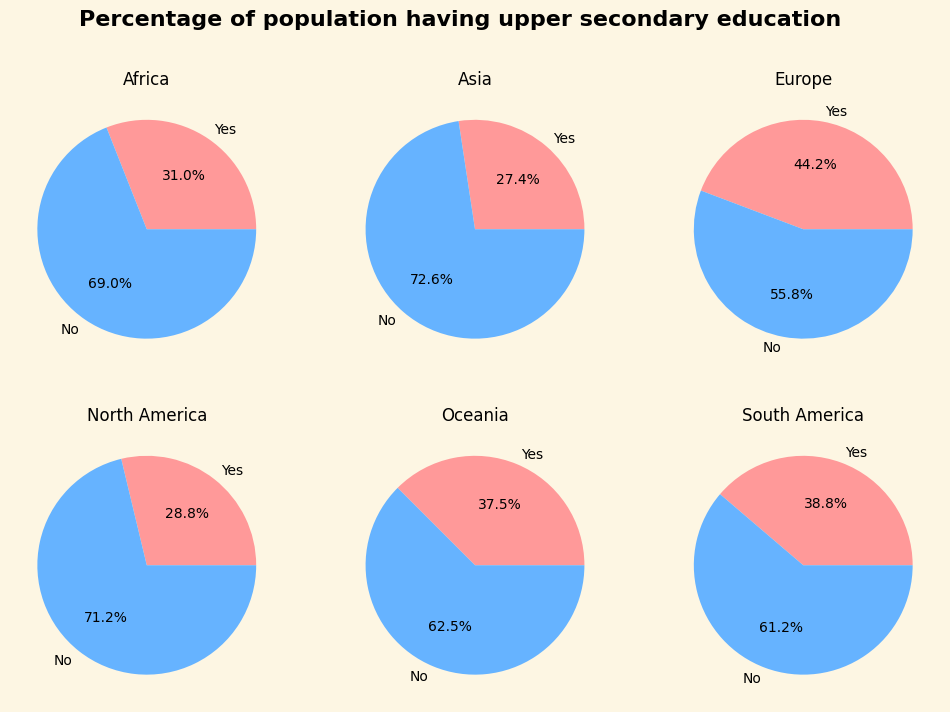

In [16]:
import matplotlib.pyplot as plt

#one can choose a certain style for the entire graph
plt.style.use('Solarize_Light2')

fig, axes = plt.subplots(2,3, figsize=(12,8))

#flatten the array for the loop
axes = axes.flatten()

#loop through each continent to create a subplot of 6 piecharts
#use zip() to loop through multiple iterables 
for ax, (continent, value) in zip(axes, continent_group.items()):
    ax.pie([value,100-value], #size of pies
           labels=["Yes", "No"],
           autopct='%1.1f%%',
           colors=['#ff9999', '#66b3ff'])
    ax.set_title(continent, fontsize=12)

fig.suptitle("Percentage of population having upper secondary education", fontsize=16, fontweight='bold')

fig.savefig("pie_chart.png", dpi=300)